# 5661 Homework 3
### Nanditha Raja - 305831258

In [1]:
%matplotlib inline
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

# Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import scale

In [2]:
# reading a CSV file directly from Web, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:
#iris_df = pd.read_csv('C:/Users/harish/Desktop/Fall17/CS4661/Lectures/HW/HW3/Heart_s.csv')

PATH = 'D:/Spring 2018/5661/HW3/Face/'

img0 = mpimg.imread('D:/Spring 2018/5661/HW3/Face/0.jpg')

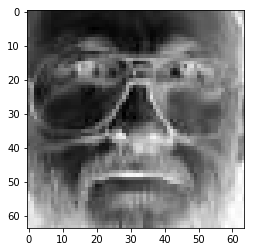

In [3]:
plt.imshow(img0,cmap=plt.cm.gray_r,interpolation='nearest')

In [4]:
df = np.zeros((400,4096))

# Reading all the images and storing them
for i in range (1,400):
    img = mpimg.imread('D:/Spring 2018/5661/HW3/Face/'+ str(i)+'.jpg')
    reshape = img.reshape(4096)
    df[i] = np.copy(reshape)

print(df)

[[   0.    0.    0. ...,    0.    0.    0.]
 [ 204.  198.  194. ...,  120.  164.  167.]
 [  86.   79.   82. ...,  189.  185.  141.]
 ..., 
 [ 163.  177.  193. ...,   44.   48.   53.]
 [ 145.  147.  151. ...,  132.  114.  117.]
 [  91.   74.   66. ...,   75.   44.   46.]]


In [5]:
# Creating the Feature Matrix for the dataset:

X = pd.DataFrame(df)  
#print (X [0::10])
X = scale(X,axis=0)

# select a Series of labels (the last column) from the DataFrame
label = pd.read_csv('D:/Spring 2018/5661/HW3/label.csv')

y = label['Label']
#print (y [0::100])

In [6]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.1" means that pick 10% of data samples for testing set, and the rest (90%) for training set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [7]:
from  sklearn.decomposition  import  PCA 

k = 50 # (k  is the number of components (new features) after dimensionality reduction) 
my_pca = PCA(n_components = k) 

# X_train is feature matrix of training set before dimensionality reduction,   
# X_train_new is feature matrix of training set after dimensionality reduction: 
X_train_new = my_pca.fit_transform(X_train) 
X_test_new = my_pca.transform(X_test) 

In [8]:
SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
SVM.fit(X_train_new, y_train)
SVM_pred = SVM.predict(X_test_new)

print(SVM_pred)

[16 32 39 22 29 38 21 12 23 28  9 13 29 21 10  1 36 11 39 25  8 26 19 12 35
  7 21 20  8 14  7 33 23  0 20  1 38 25  8 23 39  2 10 13 38 25 26 18  4 36
 26 17 13 16 38 36  4 36  5  6 14  9  7  7  9 22  6  6 24  0  4 31 31 37 14
 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11 12  1 16 24 36 33 32 13 38 20]


In [10]:
score_SVM = accuracy_score(y_test, SVM_pred)
print(score_SVM)

0.9


In [11]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, SVM_pred)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 1]]


In [12]:
from sklearn.model_selection import GridSearchCV
list_val = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

# create a dictionary for grid parameter:
param_grid = dict(C = list_val)
print(param_grid,'\n')

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(SVC(kernel='rbf', random_state=1), param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]} 

0.9675
{'C': 10}
